# Ejercicio de Kaggle Jun 21

## Importamos los datos

In [2]:
import pandas as pd
import numpy as np

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104805 entries, 0 to 104804
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Id                                    104805 non-null  int64  
 1   SeriousDlqin2yrs                      104805 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  104805 non-null  float64
 3   age                                   104805 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  104805 non-null  int64  
 5   DebtRatio                             104805 non-null  float64
 6   MonthlyIncome                         84024 non-null   float64
 7   NumberOfOpenCreditLinesAndLoans       104805 non-null  int64  
 8   NumberOfTimes90DaysLate               104805 non-null  int64  
 9   NumberRealEstateLoansOrLines          104805 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  104805 non-null  int64  
 11  

In [3]:
df_train.columns

Index(['Id', 'SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [4]:
df_train.head(20)

,Id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
1,2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
2,3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
3,4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
4,5,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
5,6,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
6,7,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
7,8,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
8,10,0,0.644226,30,0,0.309476,2500.0,5,0,0,0,0.0
9,11,0,0.018798,51,0,0.531529,6501.0,7,0,2,0,2.0


## Buscamos la correclación de los datos

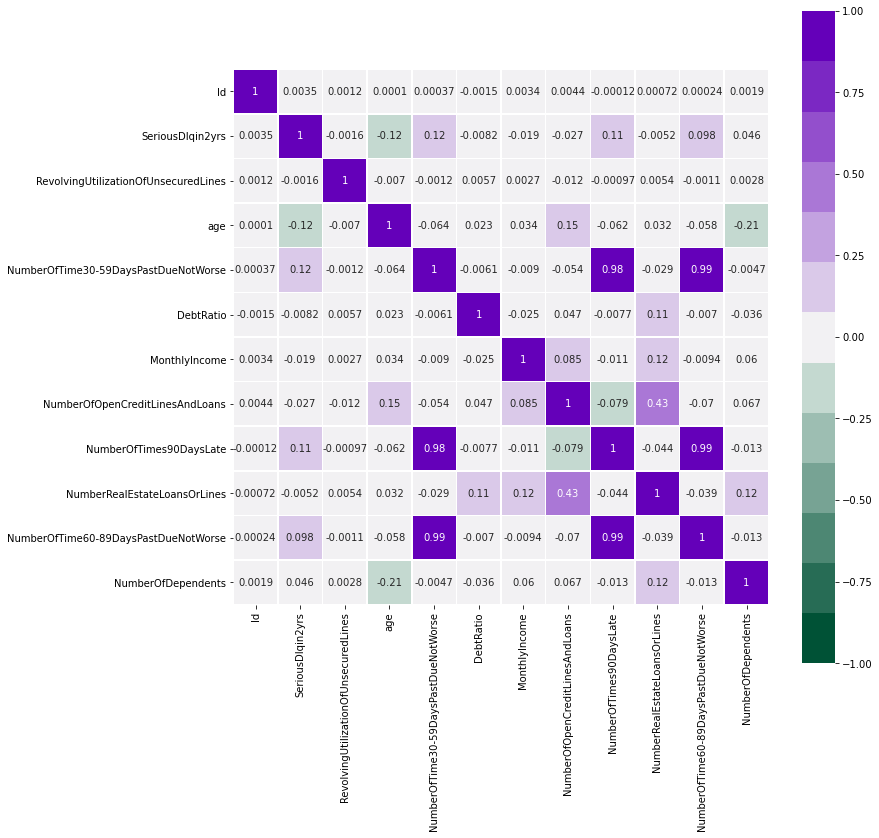

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))
sns.heatmap(df_train.corr(),
           vmin = -1,
           vmax = 1,
           annot=True,
           square = True,
           linewidths = .5,
           cmap=sns.diverging_palette(150, 277, s=100, l=30, n=13));

## First Feature Reduction

In [4]:
df_train.drop(['Id'], axis = 1, inplace = True)

In [5]:
df_train

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
1,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
2,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
3,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
4,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
104800,0,0.055518,46,0,0.609779,4335.0,7,0,1,0,2.0
104801,0,0.104112,59,0,0.477658,10316.0,10,0,2,0,0.0
104802,0,1.000000,22,0,0.000000,820.0,1,0,0,0,0.0
104803,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104805 entries, 0 to 104804
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      104805 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  104805 non-null  float64
 2   age                                   104805 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  104805 non-null  int64  
 4   DebtRatio                             104805 non-null  float64
 5   MonthlyIncome                         84024 non-null   float64
 6   NumberOfOpenCreditLinesAndLoans       104805 non-null  int64  
 7   NumberOfTimes90DaysLate               104805 non-null  int64  
 8   NumberRealEstateLoansOrLines          104805 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  104805 non-null  int64  
 10  NumberOfDependents                    102056 non-null  float64
dtype

## Análisis Univariante

C:\Users\rafam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


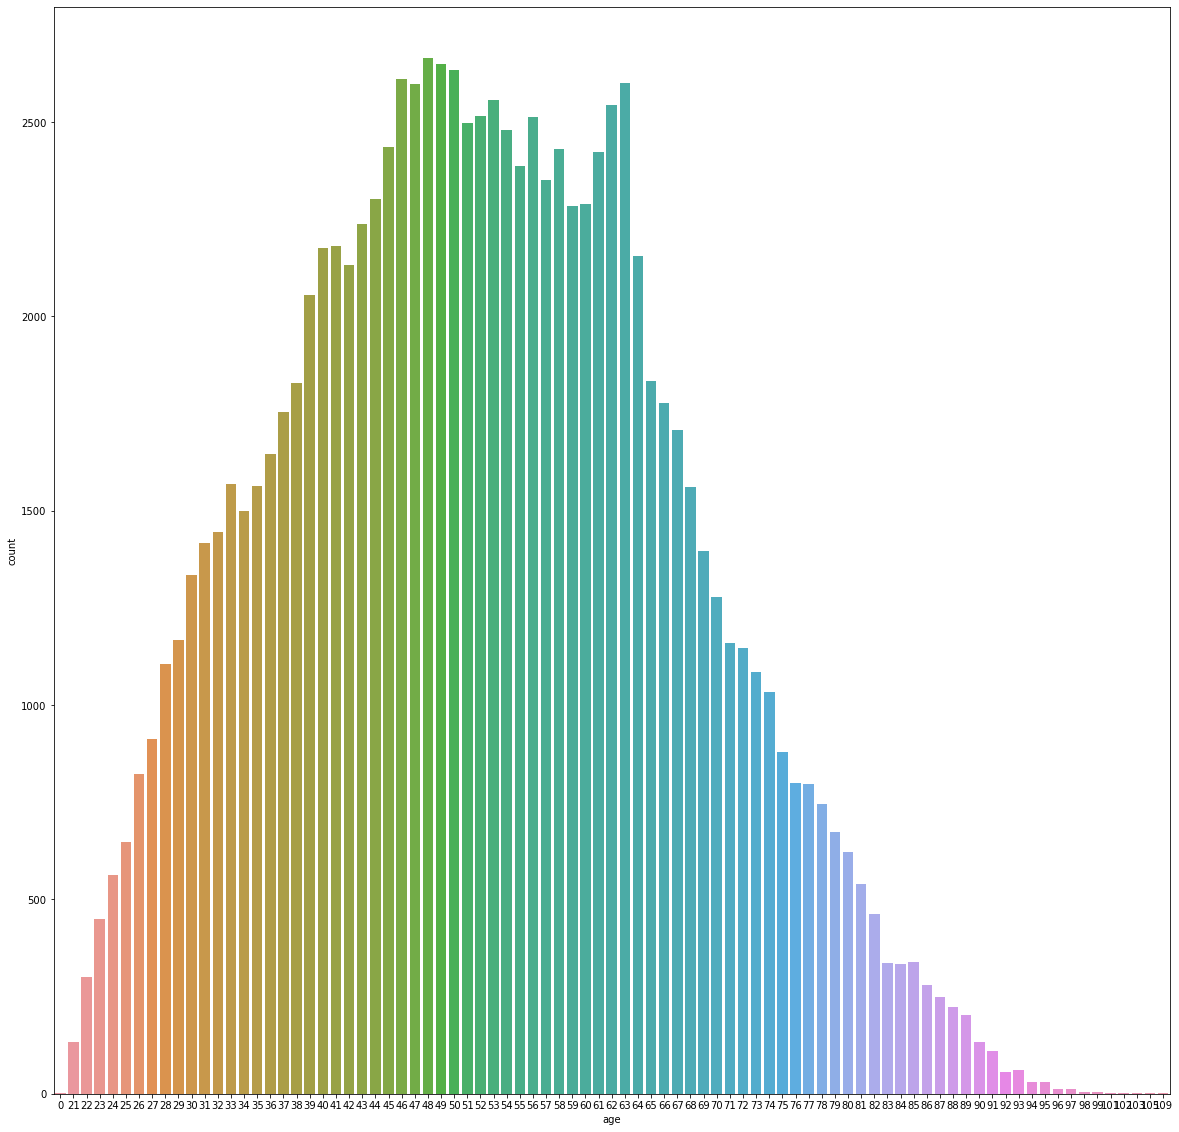

In [9]:
plt.figure(figsize=(20,20))
sns.countplot(df_train['age']);

## Limpieza de las features

In [6]:
df_train = df_train[(df_train['age'] > 18) | (df_train['age'] <= 100)]
df_train

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
1,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
2,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
3,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
4,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
104800,0,0.055518,46,0,0.609779,4335.0,7,0,1,0,2.0
104801,0,0.104112,59,0,0.477658,10316.0,10,0,2,0,0.0
104802,0,1.000000,22,0,0.000000,820.0,1,0,0,0,0.0
104803,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


## Target balance

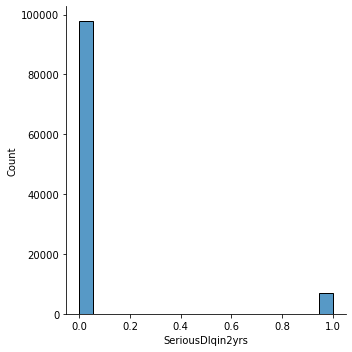

In [11]:
sns.displot(df_train['SeriousDlqin2yrs']);

## Missings

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104805 entries, 0 to 104804
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      104805 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  104805 non-null  float64
 2   age                                   104805 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  104805 non-null  int64  
 4   DebtRatio                             104805 non-null  float64
 5   MonthlyIncome                         84024 non-null   float64
 6   NumberOfOpenCreditLinesAndLoans       104805 non-null  int64  
 7   NumberOfTimes90DaysLate               104805 non-null  int64  
 8   NumberRealEstateLoansOrLines          104805 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  104805 non-null  int64  
 10  NumberOfDependents                    102056 non-null  float64
dtype

In [7]:
df_train['MonthlyIncome'] = df_train['MonthlyIncome'].fillna(0)
df_train['NumberOfDependents'] = df_train['NumberOfDependents'].fillna(0)

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104805 entries, 0 to 104804
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      104805 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  104805 non-null  float64
 2   age                                   104805 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  104805 non-null  int64  
 4   DebtRatio                             104805 non-null  float64
 5   MonthlyIncome                         104805 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       104805 non-null  int64  
 7   NumberOfTimes90DaysLate               104805 non-null  int64  
 8   NumberRealEstateLoansOrLines          104805 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  104805 non-null  int64  
 10  NumberOfDependents                    104805 non-null  float64
dtype

## Features

In [15]:
df_train.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [9]:
X = df_train.drop(['SeriousDlqin2yrs'], axis = 1)
y = df_train['SeriousDlqin2yrs']

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 42)

## Pipe & GridS

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [19]:
reg_log = Pipeline(steps = [
    ("imputer", SimpleImputer()),
    ("scaler", StandardScaler()),
    ("reglog", LogisticRegression())
])

rand_forest = RandomForestClassifier()

svm = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("selectkbest", SelectKBest()),
    ("svm", SVC())
])


reg_log_param = {
    "imputer__strategy": ['mean', 'median'],
    "reglog__penalty": ['l1', 'l2'],
    "reglog__C": np.logspace(0, 4, 10),
    "reglog__class_weight": ['balanced']
}
rand_forest_param = {
    "n_estimators": [10, 100, 1000],
    "max_features": [1,2,3]
}
svm_param = {
    'selectkbest__k': [2, 3, 4],
    'svm__kernel': ['linear', 'rbf', 'sigmoid', 'poly'],
    'svm__C': [0.001, 0.1, 0.5, 1, 5, 10, 100],
    'svm__degree': [1,2,3,4],
    'svm__gamma': ['scale', 'auto'],
    'svm__class_weight': ['balanced']
}


gs_reg_log = GridSearchCV(reg_log,
                         reg_log_param,
                         cv = 10,
                         scoring = 'auc',
                         verbose = 1,
                         n_jobs = -1)

gs_rand_forest = GridSearchCV(rand_forest,
                         rand_forest_param,
                         cv = 10,
                         scoring = 'auc',
                         verbose = 1,
                         n_jobs = -1)

gs_svm = GridSearchCV(svm,
                         svm_param,
                         cv = 10,
                         scoring = 'auc',
                         verbose = 1,
                         n_jobs = -1)

grids = {"gs_reg_log": gs_reg_log,
        "gs_rand_forest": gs_rand_forest,
        "gs_svm": gs_svm}

In [20]:
for nombre, grid in grids.items():
    grid.fit(X_train, y_train)

ValueError: 'auc' is not a valid scoring value. Use sorted(sklearn.metrics.SCORERS.keys()) to get valid options.

In [ ]:
'''# REGRESION LOGISTICA
grid_logreg = {                   
                     "penalty": ["l1","l2"], # Regularizaciones L1 y L2.
                     "C": [0.1, 0.5, 1.0, 5.0], # Cuanta regularizacion queremos
                     
                     "max_iter": [50,100,500],  # Iteraciones del Gradient Descent. No suele impactar mucho
                                                # pero en ocasiones aparecen warnings diciendo que se aumente
                     
                     "solver": ["liblinear"]  # Suele ser el más rápido
                    }


# KNN
grid_neighbors = {"n_neighbors": [3,5,7,9,11],       # Pares acepta sklearn, pero se suele poner impares, por los empates
                  "weights": ["uniform","distance"]  # Ponderar o no las clasificaciones en 
                                                     # función de la inversa de la distancia a cada vecino
                  }

# ARBOL DE DECISION
grid_arbol = {"max_depth":list(range(1,10)) # Profundidades del árbol. Cuanto más profundo, mas posibilidades de overfitting,
                                            # pero  mas preciso en entrenamiento.
              }


# RANDOM FOREST
grid_random_forest = {"n_estimators": [11], # El Random Forest no suele empeorar por exceso de
                                             # estimadores. A partir de cierto numero no merece la pena
                                             # perder el tiempo ya que no mejora mucho más la precisión.
                                             # Entre 100 y 200 es una buena cifra

                     
                     "max_depth": [3,4,5,6,10,15,17], # No le afecta tanto el overfitting como al decissiontree.
                                                      # Podemos probar mayores profundidades
                      
                     "max_features": ["sqrt", 3, 4] # Numero de features que utiliza en cada split.
                                                    # cuanto más bajo, mejor generalizará y menos overfitting.
                                                    
                     }


# SVM
grid_svm = {"C": [0.01, 0.1, 0.3, 0.5, 1.0, 3, 5.0, 15, 30], # Parametro de regularizacion
            "kernel": ["linear","poly","rbf"], # Tipo de kernel, probar varios
            "degree": [2,3,4,5], # Cuantos grados queremos para el kernel polinomico
            "gamma": [0.001, 0.1, "auto", 1.0, 10.0, 30.0] # Coeficiente de regulaizacion para los kernels rbf, poly y sigmoid
           }


# GRADIENT BOOSTING
grid_gradient_boosting = {"loss": ["deviance"], # Deviance suele ir mejor.
                          "learning_rate": [0.05, 0.1, 0.2, 0.4, 0.5],  # Cuanto más alto, mas aporta cada nuevo arbol
                          
                          "n_estimators": [20,50,100,200], # Cuidado con poner muchos estiamdores ya que vamos a
                                                           # sobreajustar el modelo
                          
                          "max_depth": [1,2,3,4,5], # No es necesario poner una profundiad muy alta. Cada nuevo
                                                    # arbol va corrigiendo el error de los anteriores.
                          
                          
                          "max_features": ["sqrt", 3, 4], # Igual que en el random forest
                          }
'''

In [15]:
reg_log = Pipeline(steps = [
    ("imputer", SimpleImputer()),
    ("scaler", StandardScaler()),
    ("reglog", LogisticRegression())
])
reg_log_param = {
    "imputer__strategy": ['mean', 'median'],
    "reglog__penalty": ['l1', 'l2'],
    "reglog__C": np.logspace(0, 4, 10),
    "reglog__class_weight": ['balanced']
}
gs_reg_log = GridSearchCV(reg_log,
                         reg_log_param,
                         cv = 10,
                         scoring = 'roc_auc',
                         verbose = 1,
                         n_jobs = -1)

gs_reg_log.fit(X_train, y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


/home/gonzalo/Documentos/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/gonzalo/Documentos/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/gonzalo/Documentos/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/gonzalo/Documentos/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/gonzalo/Documentos/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports on

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('scaler', StandardScaler()),
                                       ('reglog', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'imputer__strategy': ['mean', 'median'],
                         'reglog__C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'reglog__class_weight': ['balanced'],
                         'reglog__penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [16]:
gs_reg_log.best_params_

{'imputer__strategy': 'mean',
 'reglog__C': 3593.813663804626,
 'reglog__class_weight': 'balanced',
 'reglog__penalty': 'l2'}

In [18]:
reg_log_model = gs_reg_log.best_estimator_
reg_log_model

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('reglog',
                 LogisticRegression(C=3593.813663804626,
                                    class_weight='balanced'))])

In [23]:
df_test
df_test.drop('Id', axis = 1, inplace = True)

In [36]:
y_test

15799     0
42620     0
25653     0
53488     0
76451     0
         ..
103315    0
80675     0
37612     0
71648     0
65856     0
Name: SeriousDlqin2yrs, Length: 26202, dtype: int64

In [40]:
prediction = reg_log_model.predict_proba(X_test)
prediction

array([[0.55071849, 0.44928151],
       [0.26950669, 0.73049331],
       [0.72820043, 0.27179957],
       ...,
       [0.6796268 , 0.3203732 ],
       [0.64929348, 0.35070652],
       [0.63256973, 0.36743027]])

In [41]:
from sklearn import metrics

#fpr: false positie rate; tpr: true positive rate, thresholds: punto de inflexión en la curva AUC
fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction[:,1]) #Cogemos la probabilidad de que salga 1 (spam)

auc = metrics.auc(fpr, tpr)
auc

0.7890770310024008

In [75]:
rand_forest = RandomForestClassifier()
rand_forest_param = {
    "n_estimators": [100, 200],
    "max_features": [5,10],
    "max_depth": [4, 10]
}
gs_rand_forest = GridSearchCV(rand_forest,
                         rand_forest_param,
                         cv = 10,
                         scoring = 'roc_auc',
                         verbose = 1,
                         n_jobs = -1)

In [76]:
gs_rand_forest.fit(X_train, y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 10], 'max_features': [5, 10],
                         'n_estimators': [100, 200]},
             scoring='roc_auc', verbose=1)

In [74]:
rand_forest_model = gs_rand_forest.best_estimator_
rand_forest_model

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [53]:
prediction = rand_forest_model.predict_proba(X_test)
prediction

array([[0.98778536, 0.01221464],
       [0.91796366, 0.08203634],
       [0.99244501, 0.00755499],
       ...,
       [0.97970817, 0.02029183],
       [0.99177439, 0.00822561],
       [0.95420653, 0.04579347]])

In [54]:
from sklearn import metrics

#fpr: false positie rate; tpr: true positive rate, thresholds: punto de inflexión en la curva AUC
fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction[:,1]) #Cogemos la probabilidad de que salga 1 (spam)

auc = metrics.auc(fpr, tpr)
auc

0.8613309415735624

In [72]:
svm = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("selectkbest", SelectKBest()),
    ("svm", SVC())
])
svm_param = {
    'selectkbest__k': [2, 4],
    'svm__kernel': ['sigmoid', 'auto'],
    'svm__C': [1, 10],
    'svm__degree': [2,4],
    'svm__gamma': ['auto'],
    'svm__class_weight': ['balanced']
}
gs_svm = GridSearchCV(svm,
                         svm_param,
                         cv = 10,
                         scoring = 'roc_auc',
                         verbose = 1,
                         n_jobs = -1)

In [73]:
gs_svm.fit(X_train, y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


/home/gonzalo/Documentos/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/gonzalo/Documentos/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/gonzalo/Documentos/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/gonzalo/Documentos/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/home/gonzalo/Documentos/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn/svm/_l

KeyboardInterrupt: 

In [ ]:
svm_model = gs_svm.best_estimator_
svm_model

In [ ]:
prediction = svm_model.predict_proba(X_train)
prediction

In [ ]:
from sklearn import metrics

#fpr: false positie rate; tpr: true positive rate, thresholds: punto de inflexión en la curva AUC
fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction[:,1]) #Cogemos la probabilidad de que salga 1 (spam)

auc = metrics.auc(fpr, tpr)
auc

In [61]:
from keras.layers import Dense
from keras.models import Sequential

ann = Sequential()
ann.add(Dense(50, input_shape=X_train.shape[1:], activation = 'relu'))
ann.add(Dense(30, activation = 'sigmoid'))
ann.add(Dense(10, activation = 'sigmoid'))
ann.add(Dense(1, activation = 'sigmoid'))

ann.compile(loss='binary_crossentropy', optimizer='adam',
            metrics=['acc', 'mse', 'mae'])
    
ann.fit(X_train, y_train, epochs = 10, batch_size = 100, verbose = 2)

Epoch 1/10
787/787 - 1s - loss: 0.3217 - acc: 0.8880 - mse: 0.0914 - mae: 0.2068
Epoch 2/10
787/787 - 0s - loss: 0.2461 - acc: 0.9328 - mse: 0.0626 - mae: 0.1262
Epoch 3/10
787/787 - 0s - loss: 0.2457 - acc: 0.9328 - mse: 0.0626 - mae: 0.1260
Epoch 4/10
787/787 - 0s - loss: 0.2453 - acc: 0.9328 - mse: 0.0625 - mae: 0.1254
Epoch 5/10
787/787 - 0s - loss: 0.2449 - acc: 0.9328 - mse: 0.0624 - mae: 0.1254
Epoch 6/10
787/787 - 0s - loss: 0.2439 - acc: 0.9328 - mse: 0.0622 - mae: 0.1253
Epoch 7/10
787/787 - 0s - loss: 0.2433 - acc: 0.9328 - mse: 0.0621 - mae: 0.1251
Epoch 8/10
787/787 - 0s - loss: 0.2430 - acc: 0.9328 - mse: 0.0621 - mae: 0.1233
Epoch 9/10
787/787 - 0s - loss: 0.2420 - acc: 0.9329 - mse: 0.0619 - mae: 0.1252
Epoch 10/10
787/787 - 0s - loss: 0.2435 - acc: 0.9328 - mse: 0.0623 - mae: 0.1256


In [64]:
prediction = ann.predict(X_test)
prediction = list(map(lambda x: 1 if x > 0.5 else 0, prediction))

accuracy = sum(prediction == y_test) / len(prediction)
accuracy

0.9362644072971529

In [65]:
prediction = ann.predict_proba(X_test)
prediction

AttributeError: 'Sequential' object has no attribute 'predict_proba'